## Detector model: Kiukas et al.

In [108]:
from sympy import *
# from sympy.physics.matrices import mdft
# from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.dagger import Dagger
from sympy.plotting import plot
import numpy as np
import matplotlib.pyplot as plt

In [73]:
gamma = Symbol('gamma')
t = Symbol('t')

In [74]:
def D(_gamma):
    return Rational(1, 2) * Matrix([
        [0, 0],
        [0, _gamma]
    ])

In [75]:
H = Matrix ([
[0, 1] ,
[1, 0]
])

In [76]:
init_printing ()


In [77]:
H

⎡0  1⎤
⎢    ⎥
⎣1  0⎦

In [78]:
H.eigenvects()

⎡⎛       ⎡⎡-1⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢  ⎥⎥⎟, ⎜1, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦

It's manually seen that $\langle H \rangle = 0$ and $\langle H^2 \rangle = 1$, therefore $\sigma_{H} = 1$.

In [79]:
def K(_gamma):
    return H - I*D(_gamma)

In [80]:
K(gamma)

⎡0    1  ⎤
⎢        ⎥
⎢   -ⅈ⋅γ ⎥
⎢1  ─────⎥
⎣     2  ⎦

In [81]:
def U(_gamma):
    return lambda t: exp(-I*K(_gamma)*t)

In [82]:
def lossy_norm(_t):
    psi = U(2*sqrt(2))(_t) * Matrix([1,0])
    return re(abs(psi[0])**2 + abs(psi[1])**2)

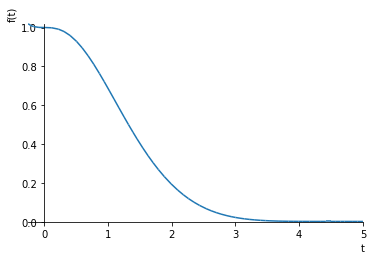

In [83]:
plot(lossy_norm(t),(t, -0.25, 5))

In [84]:
lossy_norm_n = lambdify(t, lossy_norm(t), "numpy")

In [85]:
lossy_norm_n(2)

In [96]:
plt_x = np.linspace(0.01, 5.01, 500)

In [97]:
plt_x

array([0.01      , 0.02002004, 0.03004008, 0.04006012, 0.05008016,
       0.0601002 , 0.07012024, 0.08014028, 0.09016032, 0.10018036,
       0.1102004 , 0.12022044, 0.13024048, 0.14026052, 0.15028056,
       0.1603006 , 0.17032064, 0.18034068, 0.19036072, 0.20038076,
       0.2104008 , 0.22042084, 0.23044088, 0.24046092, 0.25048096,
       0.260501  , 0.27052104, 0.28054108, 0.29056112, 0.30058116,
       0.3106012 , 0.32062124, 0.33064128, 0.34066132, 0.35068136,
       0.3607014 , 0.37072144, 0.38074148, 0.39076152, 0.40078156,
       0.4108016 , 0.42082164, 0.43084168, 0.44086172, 0.45088176,
       0.4609018 , 0.47092184, 0.48094188, 0.49096192, 0.50098196,
       0.511002  , 0.52102204, 0.53104208, 0.54106212, 0.55108216,
       0.5611022 , 0.57112224, 0.58114228, 0.59116232, 0.60118236,
       0.6112024 , 0.62122244, 0.63124248, 0.64126253, 0.65128257,
       0.66130261, 0.67132265, 0.68134269, 0.69136273, 0.70138277,
       0.71140281, 0.72142285, 0.73144289, 0.74146293, 0.75148

In [101]:
plt_y = lossy_norm_n(plt_x)

In [103]:
plt_y

array([0.99999907, 0.99999259, 0.99997524, 0.99994191, 0.99988772,
       0.99980801, 0.99969834, 0.99955446, 0.99937234, 0.99914816,
       0.99887827, 0.99855921, 0.99818773, 0.99776074, 0.99727532,
       0.99672872, 0.99611837, 0.99544186, 0.99469691, 0.99388142,
       0.99299342, 0.99203111, 0.99099279, 0.98987693, 0.9886821 ,
       0.98740703, 0.98605056, 0.98461163, 0.98308933, 0.98148284,
       0.97979146, 0.97801457, 0.9761517 , 0.97420243, 0.97216646,
       0.97004358, 0.96783367, 0.96553669, 0.96315268, 0.96068176,
       0.95812415, 0.9554801 , 0.95274997, 0.94993418, 0.94703319,
       0.94404756, 0.94097789, 0.93782483, 0.93458911, 0.93127149,
       0.92787279, 0.92439388, 0.92083567, 0.91719913, 0.91348525,
       0.90969508, 0.90582968, 0.90189018, 0.89787771, 0.89379346,
       0.88963864, 0.88541448, 0.88112224, 0.87676322, 0.87233872,
       0.86785007, 0.86329863, 0.85868577, 0.85401287, 0.84928134,
       0.84449259, 0.83964805, 0.83474916, 0.82979737, 0.82479

In [92]:
X = plt_x


In [104]:
Y = plt_y

In [107]:
-np.gradient(Y, X)

array([6.46023207e-04, 1.18873101e-03, 2.52888101e-03, 4.36726349e-03,
       6.68167696e-03, 9.45045808e-03, 1.26524737e-02, 1.62671129e-02,
       2.02742792e-02, 2.46543827e-02, 2.93883321e-02, 3.44575270e-02,
       3.98438505e-02, 4.55296610e-02, 5.14977849e-02, 5.77315089e-02,
       6.42145724e-02, 7.09311603e-02, 7.78658951e-02, 8.50038298e-02,
       9.23304407e-02, 9.98316197e-02, 1.07493667e-01, 1.15303286e-01,
       1.23247571e-01, 1.31314007e-01, 1.39490458e-01, 1.47765161e-01,
       1.56126719e-01, 1.64564097e-01, 1.73066610e-01, 1.81623921e-01,
       1.90226032e-01, 1.98863279e-01, 2.07526324e-01, 2.16206148e-01,
       2.24894048e-01, 2.33581627e-01, 2.42260790e-01, 2.50923737e-01,
       2.59562957e-01, 2.68171221e-01, 2.76741580e-01, 2.85267354e-01,
       2.93742128e-01, 3.02159749e-01, 3.10514315e-01, 3.18800175e-01,
       3.27011921e-01, 3.35144380e-01, 3.43192612e-01, 3.51151906e-01,
       3.59017770e-01, 3.66785929e-01, 3.74452319e-01, 3.82013083e-01,
      

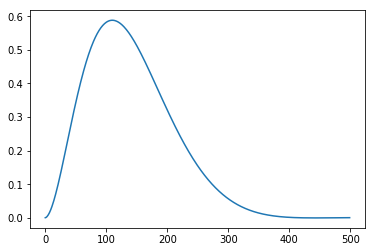

In [110]:
plt.plot(-np.gradient(Y, X))